In [1]:
import akshare as ak
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

code_list = ['sh000300']

In [2]:
index_data = {}
for code in code_list:
    df = ak.stock_zh_index_daily(symbol=code)
    df["date"] = df["date"].apply(lambda x: x.strftime("%Y-%m-%d"))
    df = df[df["date"] >= "2016-01-01"]
    index_data[code] = {"code": code, "data": df}

In [4]:
for code in code_list:
    j = index_data[code]
    df = j["data"]
    close = df["close"].to_numpy()
    j["close"] = close
    j["open"] = df["open"].to_numpy()
    j["high"] = df["high"].to_numpy()
    j["low"] = df["low"].to_numpy()

In [5]:
dates = index_data["sh000300"]["data"]["date"].to_numpy()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
n = len(dates)

In [19]:
lookback = 21
import numpy as np

rsrs_slope = np.zeros(n)
resistance = np.zeros(n)
support = np.zeros(n)
for i in range(lookback, n):
    low_prices = j["low"][i-lookback:i].reshape(-1, 1)
    high_prices = j['high'][i-lookback:i].reshape(-1, 1)
    model = LinearRegression()
    model.fit(low_prices, high_prices)
    slope = model.coef_[0][0]  # 回归斜
     # 阻力位和支撑位（回归预测）
    current_low = j["low"][i]
    current_high = j["high"][i]
    resistance[i] = model.predict([[current_low]])[0][0]
    support[i] = model.predict([[current_high]])[0][0]

    # 标准化RSRS（当前收盘价在阻力支撑间的相对位置）
    close = j["close"][i]
    if resistance[i] != support[i]:
        rsrs_slope[i] = (close - support[i]) / (resistance[i] - support[i])
    else:
        rsrs_slope[i] = 0.5  # 无趋势时取中值
    

In [20]:
import matplotlib.pyplot as plt

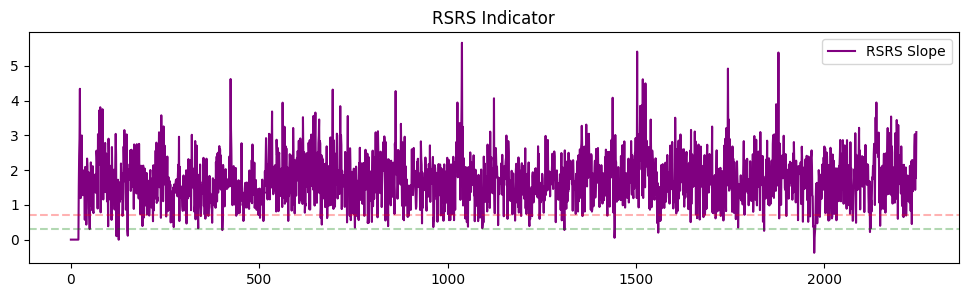

In [23]:
plt.figure(figsize=(12, 3))
plt.plot(rsrs_slope, label='RSRS Slope', color='purple')
plt.axhline(0.7, linestyle='--', color='red', alpha=0.3)
plt.axhline(0.3, linestyle='--', color='green', alpha=0.3)
plt.title('RSRS Indicator')
plt.legend()
plt.show()

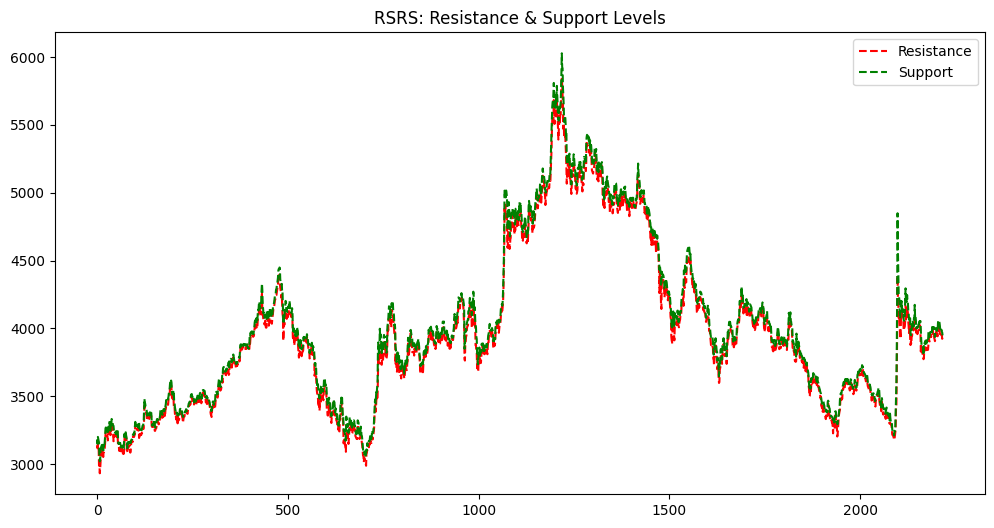

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(resistance[28:], 'r--', label='Resistance')
plt.plot(support[28:], 'g--', label='Support')
plt.title('RSRS: Resistance & Support Levels')
plt.legend()
plt.show()